In [52]:
import pandas as    pd

In [53]:
true_data = pd.read_csv('./../processed_VideoCommentsThreatCorpus.csv')
true_data['flags'] = true_data['flags'].apply(lambda x: int(eval(x)[0]))

# pred_data = pd.read_csv('collected_context_with_agents.csv')
pred_data = pd.read_csv('collected_with_agents.csv')
pred_data = pd.read_csv('collected_with_agents_wizardllm.csv')
# pred_data = pd.read_csv('collected_testdata.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'collected_with_agents.csv'

In [54]:
print(true_data.head())
print(pred_data.head())



    id  flags                                            content  video_num  \
0  1_1      1  It's because Europeans do not want to change t...          1   
1  1_2      0  ISLAM – A Simple, Humanitarian and Attractive ...          1   
2  1_3      0  ISLAM has overtaken Roman Catholicism as the b...          1   
3  1_4      1  All it means is there will be more of you to k...          1   
4  1_5      0   People should know when they are conquered ...\n          1   

   num_posts  
0        427  
1        427  
2        427  
3        427  
4        427  
   video_num document_id  agent_flags
0          1         1_1            1
1          1         1_2            0
2          1         1_3            0
3          1         1_4            1
4          1         1_5            0


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_predictions(df1: pd.DataFrame, df2: pd.DataFrame):
    df2['violence_label'] = df2['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1)

  
    # Merge on id and document_id
    merged_df = df1.merge(df2, left_on='id', right_on='document_id', suffixes=('_flags', '_violence'))
    
    # Extract labels
    y_true = merged_df['flags']
    y_pred = merged_df['violence_label']
    
    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)
    
    # Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0], palette='viridis')
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])
    
    sns.countplot(x=y_pred, ax=ax[1], palette='magma')
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])
    
    plt.show()
    

# Example usage:
# df1 = pd.read_csv('true_data.csv')  # Load first dataframe
# df2 = pd.read_csv('predicted_data.csv')  # Load second dataframe
# evaluate_predictions(df1, df2)


In [57]:
evaluate_predictions(true_data, pred_data)

KeyError: 'violence_label'

***Batch analysis***

In [58]:
true_data = pd.read_csv('./../processed_VideoCommentsThreatCorpus.csv')

pred_data = pd.read_csv('collected_batch_agents.csv')


Accuracy: 0.7520
Precision: 0.9025
Recall: 0.7520
F1 Score: 0.7913

Confusion Matrix:
 [[6033 2298]
 [  78 1171]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.84      8331
           1       0.34      0.94      0.50      1249

    accuracy                           0.75      9580
   macro avg       0.66      0.83      0.67      9580
weighted avg       0.90      0.75      0.79      9580



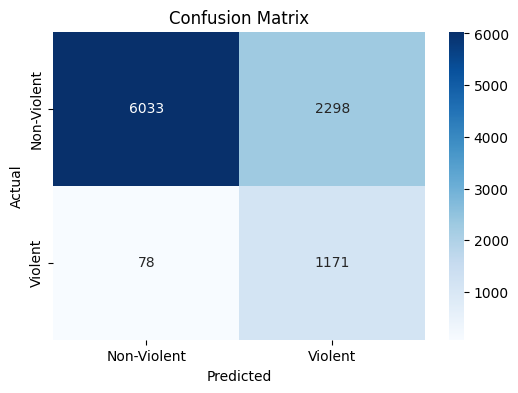

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_16314/2691629807.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, ax=ax[0], palette='viridis')
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_16314/2691629807.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_16314/2691629807.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, ax=ax[1], palette='magma')
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_16314/2691629807.py:52: UserWarning: s

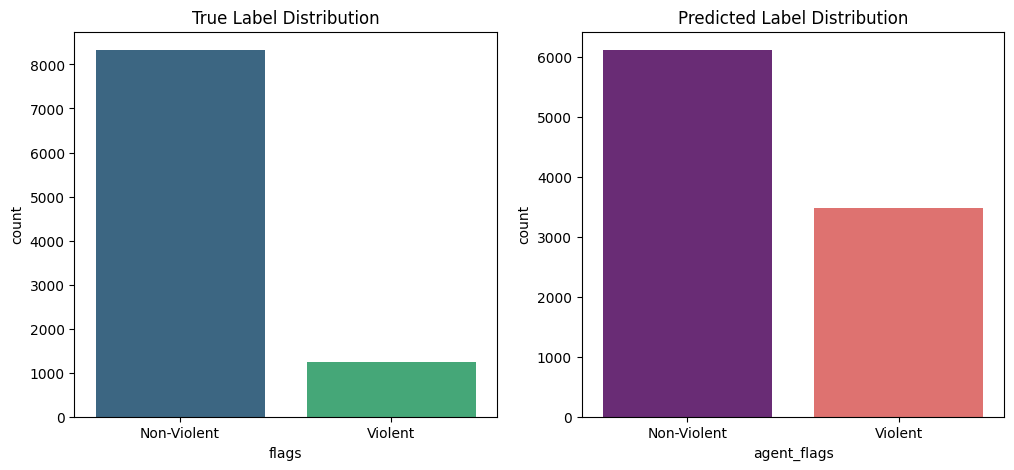

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def batch_eval(true_df: pd.DataFrame, pred_df: pd.DataFrame):
    # Ensure agent_flags values are binary integers
    #pred_df['agent_flags'] = pred_df['agent_flags'].apply(lambda x: 0 if x in [0, 1] else 1)
    
    # Merge datasets on id and document_id
    merged_df = true_df.merge(pred_df, left_on='id', right_on='document_id', suffixes=('_true', '_pred'))

    # Convert string lists like "[0]" or "[1]" into actual integers
    merged_df['flags'] = merged_df['flags'].astype(str).str.extract(r'(\d+)').astype(int)

    # Extract true and predicted labels
    y_true = merged_df['flags']
    y_pred = merged_df['agent_flags']

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0], palette='viridis')
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])

    sns.countplot(x=y_pred, ax=ax[1], palette='magma')
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])

    plt.show()


batch_eval(true_data, pred_data)

In [60]:
print("Unique values in agent_flags:", pred_data['agent_flags'].unique())

# Count occurrences of each unique value
print("Value counts in agent_flags:")
print(pred_data['agent_flags'].value_counts())

Unique values in agent_flags: [1 0]
Value counts in agent_flags:
agent_flags
0    6253
1    3541
Name: count, dtype: int64


In [61]:
merged_df = true_data.merge(pred_data, left_on='id', right_on='document_id', suffixes=('_true', '_pred'))

In [62]:
merged_df

,id,flags,content,video_num_true,num_posts,video_num_pred,document_id,agent_flags
0,1_1,[1],It's because Europeans do not want to change t...,1,427,1,1_1,1
1,1_2,[0],"ISLAM – A Simple, Humanitarian and Attractive ...",1,427,1,1_2,0
2,1_3,[0],ISLAM has overtaken Roman Catholicism as the b...,1,427,1,1_3,0
3,1_4,[1],All it means is there will be more of you to k...,1,427,1,1_4,1
4,1_5,[0],People should know when they are conquered ...\n,1,427,1,1_5,0
...,...,...,...,...,...,...,...,...
9575,19_9840,[0],we know islam teach you to hate and kill the d...,19,100,19,19_9840,1
9576,19_9841,[0],islam will dominate the world for short time b...,19,100,19,19_9841,0
9577,19_9842,[0],"Sorry, but it will not dominate the world ;).\...",19,100,19,19_9842,0
9578,19_9843,[0],they didnt stop anything...\nthey acctually st...,19,100,19,19_9843,0


In [64]:
# Filter merged_df where 'agent_flags' has the specified values
invalid_rows = merged_df[merged_df['agent_flags'].isin([-1, -2, -99, -9876532])]

# Print all 'content', 'agent_flags', and 'id' columns for these invalid rows
print(invalid_rows[['content', 'agent_flags', 'id']])



Empty DataFrame
Columns: [content, agent_flags, id]
Index: []
